#### In this regression task we will predict the percentage of marks that a student is ecpected to score based upon the number of hours they studied.

In [1]:
#importing required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn import metrics
from sklearn.metrics import r2_score

In [3]:
#reading data
dataset = pd.read_csv("http://bit.ly/w-data")
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
dataset.shape

(25, 2)

In [5]:
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

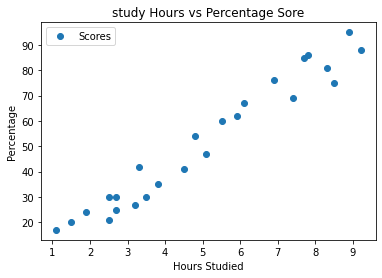

In [6]:
#plotting scatter plot to determine the relationship between feature and target
dataset.plot(x='Hours',y='Scores',style='o')
plt.title('study Hours vs Percentage Sore')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage')
plt.show()

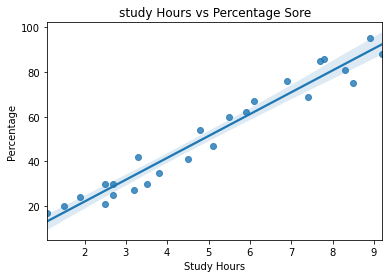

In [7]:
#plotting regressor plot to determine the relationship between feature and target
sns.regplot(x=dataset['Hours'],y=dataset['Scores'],data=dataset)
plt.title('study Hours vs Percentage Sore')
plt.xlabel('Study Hours')
plt.ylabel('Percentage')
plt.show()

In [8]:
#preapring the data
X = dataset['Hours'].values.reshape(-1,1)
Y = dataset['Scores'].values.reshape(-1,1)

In [9]:
#splitting the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

### Training model using Linear Regression

In [10]:
#traning the model using Linear Regression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [11]:
#determining the intercept and coefficient term for regression line
print(regressor.intercept_)
print(regressor.coef_)

[2.01816004]
[[9.91065648]]


In [12]:
#predivting the score using test data
y_pred = regressor.predict(X_test)

In [13]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


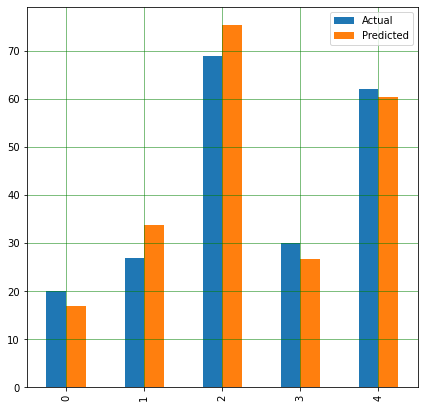

In [14]:
#plotting the grid to depict the actual and predicted value
df.plot(kind='bar',figsize=(7,7))
plt.grid(which='major', linewidth='0.5', color='green')
plt.grid(which='minor', linewidth='0.5', color='black')
plt.show()

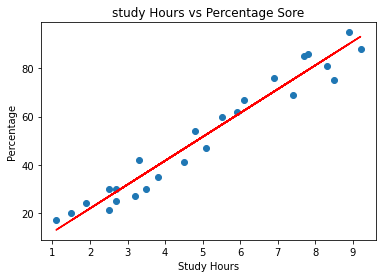

In [15]:
#plotting the regression line
plt.scatter(X,Y)
fit_line = regressor.coef_*X+regressor.intercept_
plt.plot(X, fit_line, color='red')
plt.title('study Hours vs Percentage Sore')
plt.xlabel('Study Hours')
plt.ylabel('Percentage')
plt.show()

In [16]:
#estimating training and test score
print("Training Score:",regressor.score(X_train,y_train))
print("Test Score:",regressor.score(X_test,y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105355


In [18]:
#evaluating the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root Mean Squared Error: 4.647447612100367
Coefficient of determination: 0.95


In [19]:
r2_score(y_test, y_pred)

0.9454906892105355

### Training model using Random Forest

In [20]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
y_pred1 = rf.predict(X_test)

In [21]:
dd = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred1.flatten()})
dd

,Actual,Predicted
0,20,19.246429
1,27,36.703929
2,69,84.220000
3,30,23.263929
4,62,63.610000


In [22]:
#evaluating the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred1))

Mean Absolute Error: 6.804714285714286
Mean Squared Error: 74.86985158163264
Root Mean Squared Error: 8.652736652737829
Coefficient of determination: 0.81


In [23]:
r2_score(y_test, y_pred1)

0.8110492338440525

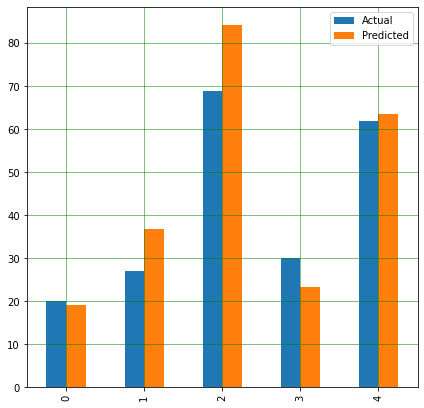

In [24]:
#plotting the grid to depict the actual and predicted value
dd.plot(kind='bar',figsize=(7,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Traing model using Gradient Boosting Regression

In [25]:
gb=GradientBoostingRegressor()
gb.fit(X_train,y_train)

GradientBoostingRegressor()

In [26]:
y_pred2=gb.predict(X_test)

In [27]:
dd1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred2.flatten()})
dd1

,Actual,Predicted
0,20,17.071917
1,27,41.820114
2,69,84.985909
3,30,21.207107
4,62,67.006597


In [28]:
#evaluating the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred2))

Mean Absolute Error: 9.506719273714435
Mean Squared Error: 117.22794306712603
Root Mean Squared Error: 10.827185371421606
Coefficient of determination: 0.70


In [29]:
r2_score(y_test, y_pred2)

0.7041491442884967

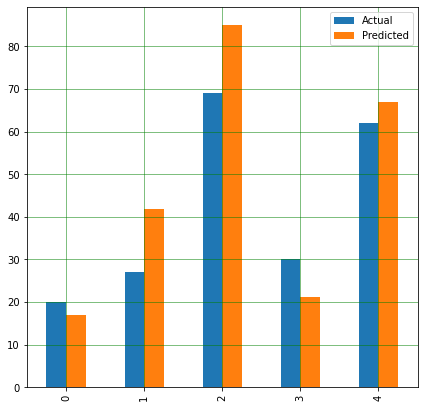

In [30]:
#plotting the grid to depict the actual and predicted value
dd1.plot(kind='bar',figsize=(7,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [31]:
#comparing the models
print('Mean Absolute Error for linear regression:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Absolute Error for Random forest:', metrics.mean_absolute_error(y_test, y_pred1))  
print('Mean Absolute Error for Gradient Boosting:', metrics.mean_absolute_error(y_test, y_pred2))  

Mean Absolute Error for linear regression: 4.183859899002975
Mean Absolute Error for Random forest: 6.804714285714286
Mean Absolute Error for Gradient Boosting: 9.506719273714435


#### From above observations we can say Linear Regression is the best

In [17]:
#predicting the score percentage on our own data
new_score=regressor.predict([[9.25]])
print("Score for {0} hours is {1}".format(9.25,new_score))

Score for 9.25 hours is [[93.69173249]]
